In [ ]:
import cv2 #to read and process images
import matplotlib.pyplot as plt #to show resultant images 
import mediapipe as mp

# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose
# Setting up the Pose model for images.
pose_img = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1)
# Setting up the Pose model for videos.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5, model_complexity=1)

# Initializing mediapipe drawing class to draw landmarks on specified image.
mp_drawing = mp.solutions.drawing_utils

In [18]:
def estimPose_img(input_file, pose=pose_img, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                   thickness=5, circle_r=5, display=True):
    
    # Read the input image
    if isinstance(input_file, str) :
        input_img = cv2.imread(input_file)
    else :
        input_img = input_file
    
    # Create a copy of the input image
    output_img = input_img.copy()
    
    # Convert the image from BGR into RGB format.
    RGB_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(RGB_img)
    
    # Retrieve the height and width of the input image.
    height, width, _ = input_img.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(output_img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(landmarks_c, thickness, circle_r),
                                  mp_drawing.DrawingSpec(connection_c, thickness, circle_r))
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if we want to display.
    if display:
        # Display the original input image and the resulting image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(input_img[:,:,::-1]);plt.title("Original image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_img[:,:,::-1]);plt.title("Output image");plt.axis('off');
        
        # Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Just get output_img and landmarks
    else:
        # Return the output image and the found landmarks.
        return output_img, landmarks

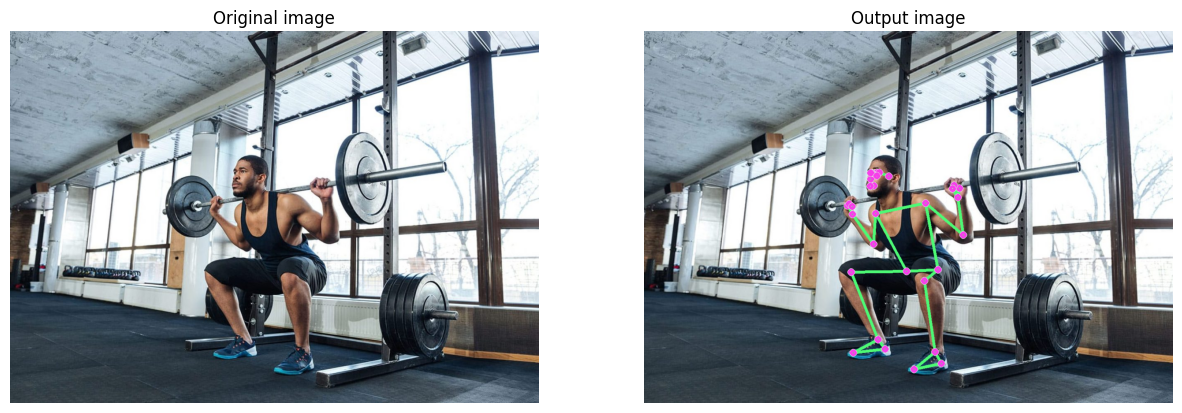

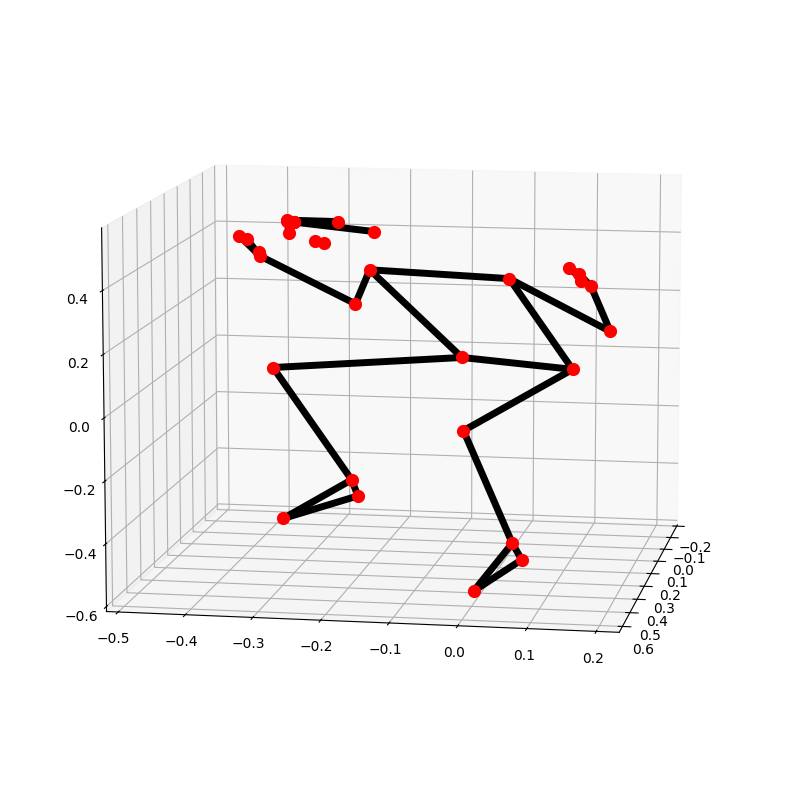

In [19]:
estimPose_img('images/wl_pose.jpg')

In [20]:
pose1 = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1)
pose2 = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2)

In [21]:
def compl1_vs_compl2(input_file, pose1=pose1, pose2=pose2):
    output_img1, _ = estimPose_img(input_file, pose=pose1, display=False)
    output_img2, _ = estimPose_img(input_file, pose=pose2, display=False)

    plt.figure(figsize=[15,15])
    plt.subplot(121);plt.imshow(output_img1[:,:,::-1]);plt.title("Output image model_complexity=1");plt.axis('off');
    plt.subplot(122);plt.imshow(output_img2[:,:,::-1]);plt.title("Output image model_complexity=2");plt.axis('off');

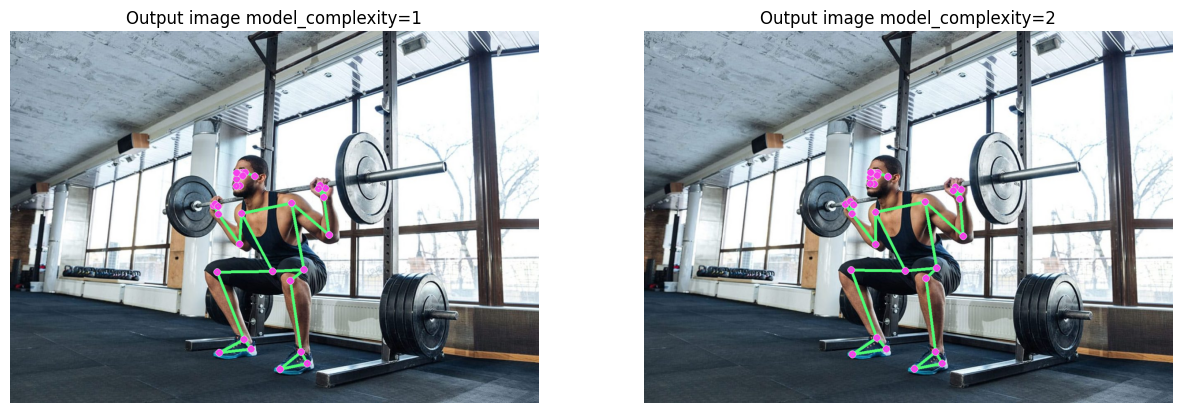

In [22]:
compl1_vs_compl2('images/wl_pose.jpg')

In [ ]:
def estimPose_video(input_file, pose_video=pose_video, landmarks_c=(234,63,247), connection_c=(117,249,77), 
                 thickness=5, circle_r=5, display=True, nrows_frames=4, ncols_frames=3):
    
    # Initialize the VideoCapture object to read from a video stored in the disk.
    video = cv2.VideoCapture(input_file)
    
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []
    
    for i in range(total_frames):
        # Read a frame.
        ok, frame = video.read()
    
        # Check if frame is not read properly.
        if not ok:
            # Break the loop.
            break
        
        # Get the width and height of the frame
        frame_height, frame_width, _ =  frame.shape
        # Resize the frame while keeping the aspect ratio.
        frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
        frame, _ = estimPose_img(frame, pose_video, landmarks_c, connection_c, thickness, 
                              circle_r, display=False)
    
        frames.append(frame)
    
    if display :
        fig, axarr = plt.subplots(nrows_frames,ncols_frames,figsize=[15, 15])
        k=0
        for i in range(nrows_frames):
            for j in range(ncols_frames):
                axarr[i,j].imshow(frames[k][:,:,::-1]);axarr[i,j].axis('off')
                k+=1
    else:
        return frames